### Tugas Praktikum

Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Muat dataset
data = pd.read_csv("medical_cost_personal.csv")

# Eksplorasi dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [41]:
# Variabel bebas (fitur)
X = data[['age', 'bmi', 'children']]

# Variabel target
y = data['charges']

### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [42]:
# Bagi dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Lakukan feature scaling jika diperlukan.

In [43]:
# Feature Scaling (opsional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [44]:
from sklearn.linear_model import LinearRegression

# Membuat model Multiple Linear Regression
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

LinearRegression()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [45]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'R-squared: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared: 0.15489592484270776
Mean Squared Error (MSE): 131201335.64669803
Mean Absolute Error (MAE): 9181.311632897381


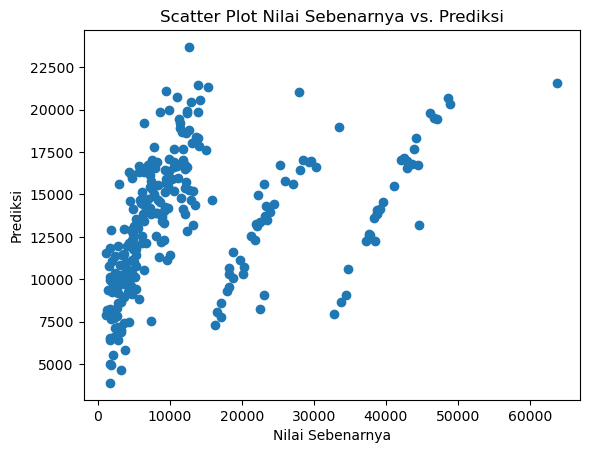

In [47]:
# Scatter plot hasil prediksi vs. nilai sebenarnya
plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Scatter Plot Nilai Sebenarnya vs. Prediksi")
plt.show()